In [1]:
from clipppy import load_config
from matplotlib import pyplot as plt
import torch, pyro, numpy as np 
import collections, os
from ruamel.yaml import YAML
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pyro import distributions as dist

import sys
sys.path.append('/home/eliasd/lensing/elias_utils')
from plotting import *
from channels import split_channels

In [2]:
config = load_config('config_gen_mock_lens_source.yaml')

model = config.umodel
guide = config.guide 

PARAMS = YAML().load(open('params.yaml'))['lens_source']

/home/eliasd/.pyenv/versions/3.9.7/envs/lens-3.9.7/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
SYSTEM_NAME = "ngc4414"

SOURCE_DIR = '../../mock_data/sources'
source_name = f'{SYSTEM_NAME}.npy'

SAVE_DIR = "gen_obs"
cmc = PARAMS['truth']['cmc2/c1']
n_channels  = model.n_channels
sigma_stat = model.stochastic_specs['sigma_stat']

print(f'cmc = {cmc}, n_channels = {n_channels}, sigma_stat = {sigma_stat}')

cmc = 0.1, n_channels = 2, sigma_stat = 0.01


/home/eliasd/lensing/clipppy/src/clipppy/stochastic/stochastic.py:102: RuntimeWarning: Getting items from StochasticSpecs by name is frowned upon and only supports explicitly named specs at the first level that at most come from mappings (no dynamic generation).
  warn(f'Getting items from {type(self).__name__} by name is frowned upon'


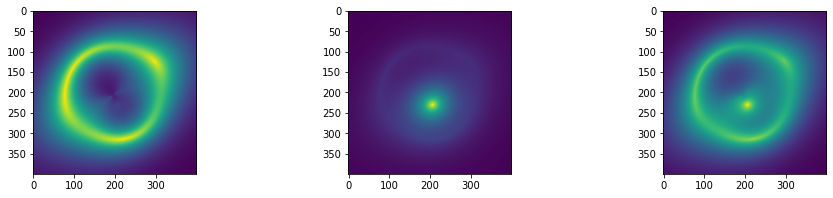

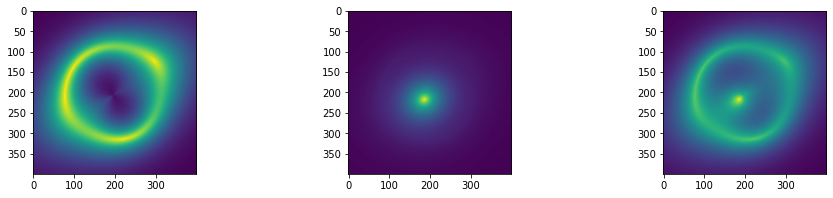

In [4]:
if n_channels >= 2:
    plot_imshow(split_channels(model()), size_y = 3)
    plot_imshow(split_channels(model()), size_y = 3)
if n_channels == 1:
    plot_imshow([model(), model()], size_y = 3)

In [5]:
with pyro.poutine.trace() as tracer, pyro.condition(data=PARAMS['truth']):
    OBS = model()
OBSTRACE = tracer.trace

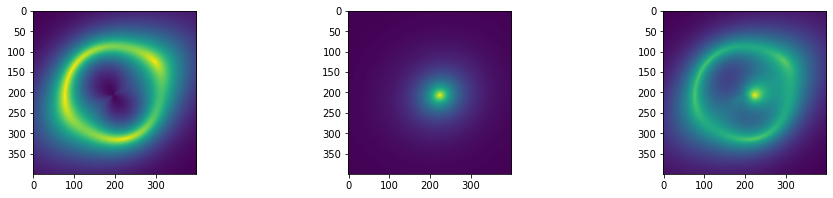

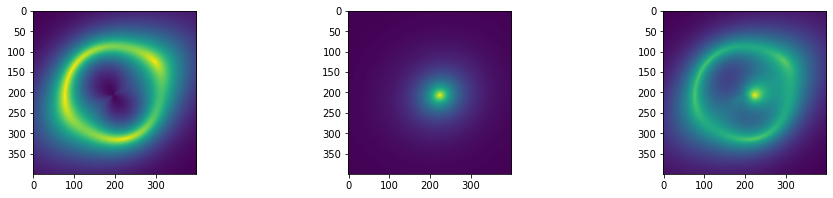

In [6]:
if n_channels >= 2:
    plot_imshow(split_channels(OBS), size_y = 3)
    plot_imshow(split_channels(OBS), size_y = 3)
if n_channels == 1:
    plot_imshow([OBS, OBS], size_y = 3)

In [7]:
for k in OBSTRACE.nodes.keys(): 
    print(f'{k:<15} {OBSTRACE.nodes[k]["fn"]}\n\t\t{OBSTRACE.nodes[k]["value"]}')

cmc             Uniform(low: 0.0, high: 1.0)
		0.010612130165100098
lenslight2/x    Uniform(low: -1.0, high: 1.0)
		0.3
lenslight2/y    Uniform(low: -1.0, high: 1.0)
		0.1
Xsrc            MaskedDistribution()
		tensor([[-1.5134, -1.5037, -1.4940,  ...,  1.4551,  1.4656,  1.4761],
        [-1.5106, -1.5008, -1.4911,  ...,  1.4526,  1.4631,  1.4737],
        [-1.5077, -1.4980, -1.4882,  ...,  1.4501,  1.4607,  1.4712],
        ...,
        [-1.4476, -1.4370, -1.4265,  ...,  1.4196,  1.4297,  1.4398],
        [-1.4502, -1.4397, -1.4291,  ...,  1.4225,  1.4326,  1.4427],
        [-1.4528, -1.4423, -1.4318,  ...,  1.4254,  1.4355,  1.4456]])
Ysrc            MaskedDistribution()
		tensor([[-1.5611, -1.5582, -1.5554,  ..., -1.5555, -1.5579, -1.5604],
        [-1.5508, -1.5480, -1.5451,  ..., -1.5447, -1.5471, -1.5496],
        [-1.5406, -1.5378, -1.5349,  ..., -1.5339, -1.5364, -1.5388],
        ...,
        [ 1.5507,  1.5481,  1.5455,  ...,  1.6003,  1.6032,  1.6061],
        [ 1.5612,  1.55

In [8]:
# torch.save(OBS, os.path.join(SAVE_DIR,f'mock_cmc={cmc}_sigma={sigma_stat}.pt'))
# torch.save(OBS, f'mock_cmc={cmc}_sigma={sigma_stat}.pt')
torch.save(OBS, 'gen_source_lens_source.pt')